In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5

In [2]:
def get_value(base_dir):
    
    values = []
    
    time_dirs = sorted(os.listdir(base_dir), key=float)
    
    for time_dir in time_dirs:
        time_path = os.path.join(base_dir, time_dir)
        
        if os.path.isdir(time_path):
            file_path = os.path.join(time_path, 'surfaceFieldValue.dat')
            
            if os.path.isfile(file_path):
                
                try:
                    with open(file_path, 'r') as f:
                        lines = f.readlines()
        
                    if len(lines) > 0:
                        
                        last_line = lines[-1]
                        parts = last_line.split()
                        
                        if len(parts) >= 3:
                            last_value = float(parts[2])
                            values.append(last_value)
                        else:
                            print(f"No se encontró un tercer valor en la última línea del archivo {file_path}")
                except Exception as e:
                    print(f"Error leyendo el archivo {file_path}: {e}")
            else:
                print(f"El archivo {file_path} no existe")
    
    return values

In [3]:
rpa = np.array(get_value("fluxS_RPA"))
lpa = np.array(get_value("fluxS_LPA"))
ivc = -np.array(get_value("fluxS_IVC"))

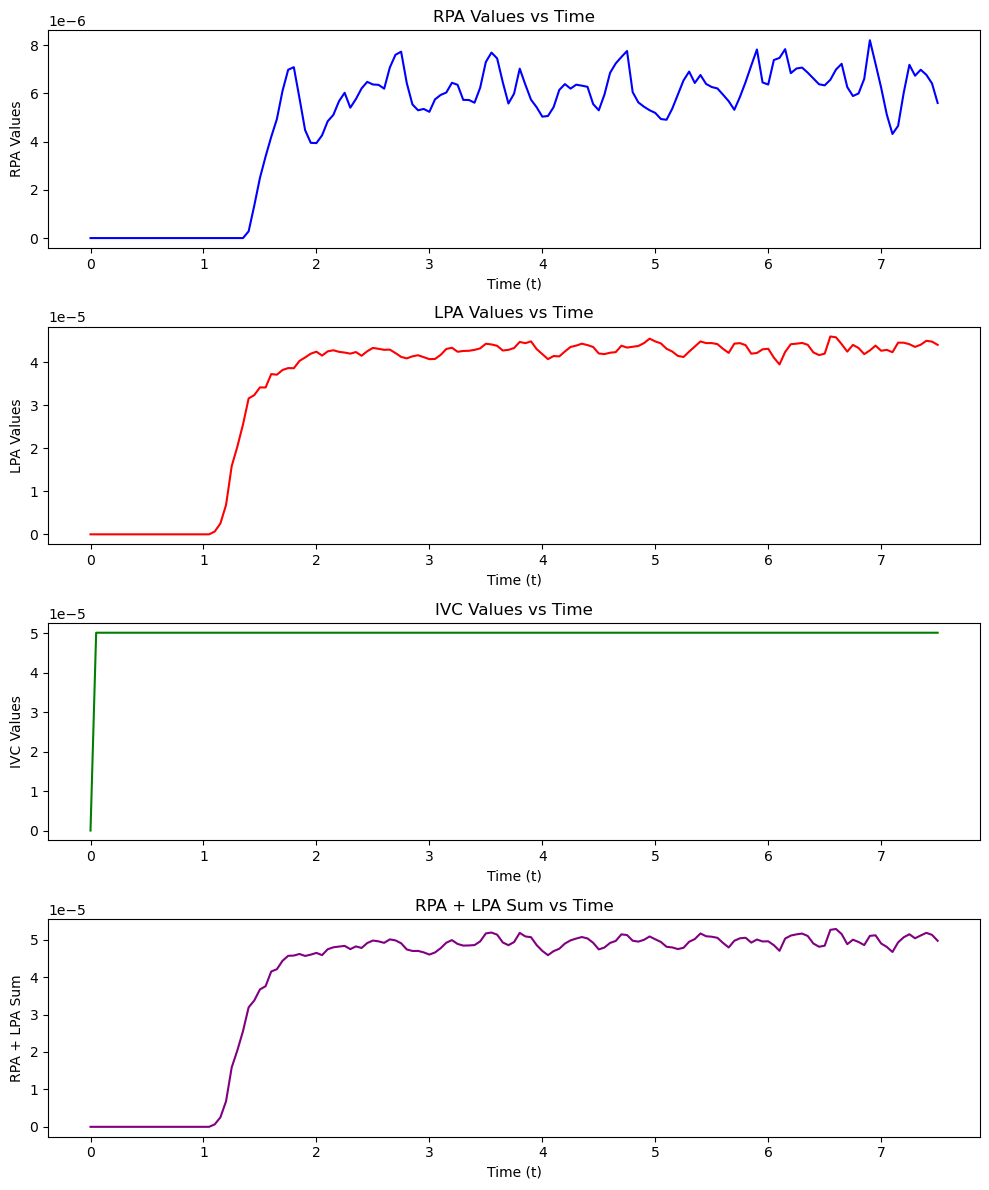

In [4]:
%matplotlib inline
n=0
t = np.arange(n*5e-3, 7.505, 0.05)

rpa_lpa_sum = rpa + lpa

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].plot(t, rpa, color='b')
axs[0].set_title('RPA Values vs Time')
axs[0].set_ylabel('RPA Values')

axs[1].plot(t, lpa, color='r')
axs[1].set_title('LPA Values vs Time')
axs[1].set_ylabel('LPA Values')

axs[2].plot(t, ivc, color='g')
axs[2].set_title('IVC Values vs Time')
axs[2].set_ylabel('IVC Values')

axs[3].plot(t, rpa_lpa_sum, color='purple')
axs[3].set_title('RPA + LPA Sum vs Time')
axs[3].set_ylabel('RPA + LPA Sum')

for ax in axs:
    ax.set_xlabel('Time (t)')

plt.tight_layout()
plt.show()

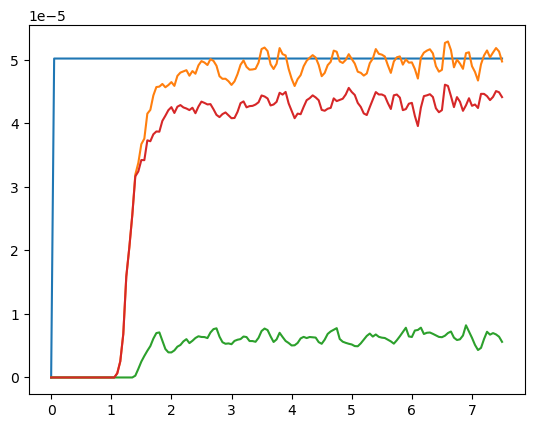

In [5]:
%matplotlib inline
plt.plot(t, ivc, t,rpa_lpa_sum, t , rpa, t, lpa)

C:\Users\lucia\AppData\Local\Temp\ipykernel_17340\2109716364.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(t, rpa/rpa_lpa_sum, t, lpa/rpa_lpa_sum)


(0.0, 1.0)

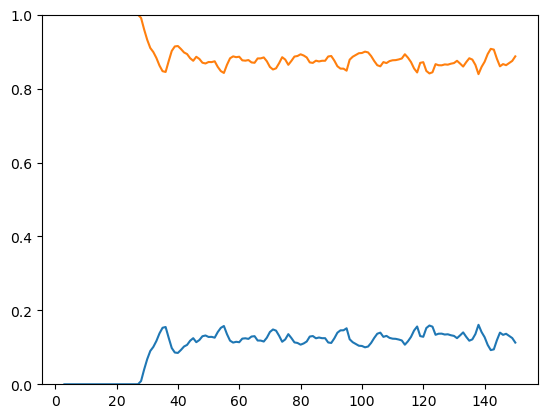

In [6]:
%matplotlib inline
n=0
t = np.arange(0, 151, 1)
plt.plot(t, rpa/rpa_lpa_sum, t, lpa/rpa_lpa_sum)
plt.ylim(0,1)

In [7]:
ratio_rpa = rpa/rpa_lpa_sum
ratio_lpa = lpa/rpa_lpa_sum

C:\Users\lucia\AppData\Local\Temp\ipykernel_17340\3870957066.py:1: RuntimeWarning: invalid value encountered in divide
  ratio_rpa = rpa/rpa_lpa_sum
C:\Users\lucia\AppData\Local\Temp\ipykernel_17340\3870957066.py:2: RuntimeWarning: invalid value encountered in divide
  ratio_lpa = lpa/rpa_lpa_sum


In [13]:
np.mean(ratio_rpa[50:])

0.12706492933896923

In [11]:
np.mean(ratio_lpa[50:])

0.8729350706610306

In [10]:
len(rpa)

151